## TL;DR
This notebook shows how to discover a petri net model using the alpha miner. 

In [1]:
# %load /home/jonathan/.ipython/profile_default/startup/01-setup.py
# start up settings for jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

plt.style.use('ggplot')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000

# to avoid have warnings from chained assignments
pd.options.mode.chained_assignment = None


In [2]:
from opyenxes.data_in.XUniversalParser import XUniversalParser
from opyenxes.data_out.XesXmlGZIPSerializer import XesXmlGZIPSerializer

from podspy.log import factory as fty
from podspy.structure import *
from podspy.discovery import alpha
from podspy.structure import CausalMatrix
from podspy.petrinet.nets import *
from podspy.petrinet import visualize as vis

from IPython.display import Image

## Load the event log

In [3]:
xlog_fp = './data/small-log.xes.gz'

with open(xlog_fp, 'r') as f:
    xlog = XUniversalParser().parse(f)[0]

lt = fty.XLog2LogTable().xlog2table(xlog)
get_activity = lambda val: val[1]
lt.event_df['activity'] = lt.event_df['concept:name'].apply(get_activity)

## There are four trace variants 

In [4]:
lt.get_trace_variants().drop_duplicates('variant')

,caseid,variant_id,variant
0,0,variant 0,a|c|d
45,100,variant 1,a|c|e
83,125,variant 2,b|c|e
105,45,variant 3,b|c|d


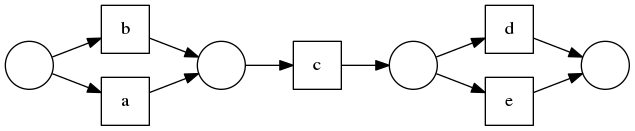

In [5]:
# sort activities
cmat = CausalMatrix.build_from_logtable(lt, sort=True)

net = alpha.discover(cmat)
net_fp = os.path.join('.', 'data', 'alpha.png')
G = vis.net2dot(net.net)
G.draw(net_fp)
Image(net_fp)